<H1>Prediction using Supervised ML</H1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<h2>Plotting the Given Dataset</h2>

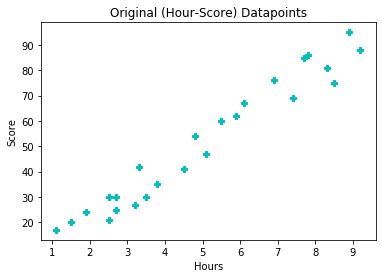

In [4]:
x=np.array(df['Hours']).reshape(-1,1)
y=np.array(df['Scores']).reshape(-1,1)
plt.plot(x,y,'Pc')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Original (Hour-Score) Datapoints')
#plt.legend()
plt.show()

<h2>Training the Data using Scikit Learn Linear Regression Model</h2>

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [6]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,shuffle=True)
LR = LinearRegression().fit(train_x,train_y)
print('The count of Training and Testing Data is:\n','Training Count:',len(train_x),'\n','Tesing Count: ',len(test_x))
print('The Intercept and Coefficient of fitted Regression Line is:\n','Intercept: ',LR.intercept_,'\n','Coef: ',LR.coef_)

The count of Training and Testing Data is:
 Training Count: 17 
 Tesing Count:  8
The Intercept and Coefficient of fitted Regression Line is:
 Intercept:  [0.01087255] 
 Coef:  [[9.99788035]]


In [7]:
LR.score(train_x,train_y)

0.9490819543667074

<h2>Predicting the Test Set</h2>

In [8]:
ypred = LR.predict(test_x)
print('the predicted score of students depending upon their study hours is:\n')
for i,j in zip(test_x,ypred):
    print(' The Estimated Score for a student who study for {0:.2f} Hours is {1:.3f}'.format(i[0],j[0]))
print('\n')

the predicted score of students depending upon their study hours is:

 The Estimated Score for a student who study for 8.90 Hours is 88.992
 The Estimated Score for a student who study for 2.70 Hours is 27.005
 The Estimated Score for a student who study for 5.90 Hours is 58.998
 The Estimated Score for a student who study for 6.90 Hours is 68.996
 The Estimated Score for a student who study for 7.40 Hours is 73.995
 The Estimated Score for a student who study for 3.30 Hours is 33.004
 The Estimated Score for a student who study for 1.10 Hours is 11.009
 The Estimated Score for a student who study for 1.90 Hours is 19.007




<h2>Evaluating the Model</h2>

In [9]:
rmse = sqrt(mean_squared_error(test_y, ypred))
r2score = r2_score(test_y,ypred)
print('Evaluation:\n')
print('The RMSE is: ',rmse,'\nThe RSquared is: ',r2score)

Evaluation:

The RMSE is:  5.807739964727157 
The RSquared is:  0.9500933999800047


<h2>Plotting the Estimated value accross Actual value</h2>

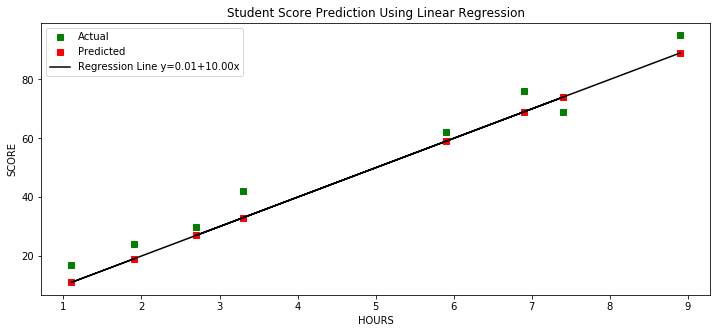

In [10]:
plt.rcParams["figure.figsize"] = (12,5)

arrx = np.array([])
arrx = np.append(np.append(arrx,range(1,10)),np.array([9.25,10]))

arry = np.array([])
a=(LR.intercept_+LR.coef_*9.25)[0][0]
b=(LR.intercept_+LR.coef_*10)[0][0]
arry = np.array([a,b])


plt.plot(test_x,test_y,'sg',label='Actual')
plt.plot(test_x,ypred,'sr',label='Predicted')
plt.plot(test_x,ypred,'k',label='Regression Line y={0:.2f}+{1:.2f}x'.format(LR.intercept_[0],LR.coef_[0][0]))

#plt.xticks(arrx)
#plt.yticks(np.arange(min(arry), max(arry)+1, 1.0))
plt.xlabel('HOURS')
plt.ylabel('SCORE')
plt.title('Student Score Prediction Using Linear Regression')
plt.legend()
plt.show()

<h2>Question: What will be predicted score if a student studies for 9.25 hrs/ day?</h2>

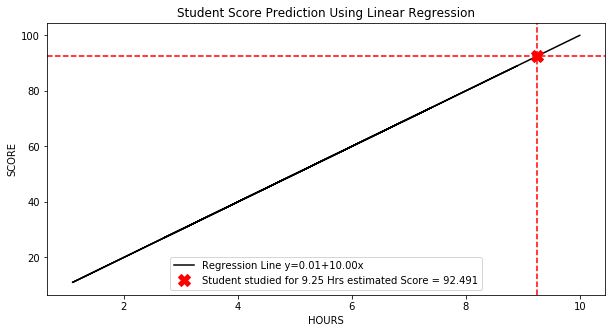

In [11]:
plt.rcParams["figure.figsize"] = (10,5)
arrx = np.array([9.25,10])
arrx=np.append(test_x,arrx)

a=(LR.intercept_+LR.coef_*9.25)[0][0]
b=(LR.intercept_+LR.coef_*10)[0][0]
arry = np.array([a,b])
arry=np.append(ypred,arry)

plt.plot(arrx,arry,'k',label='Regression Line y={0:.2f}+{1:.2f}x'.format(LR.intercept_[0],LR.coef_[0][0]))
plt.plot(np.array([9.25]),np.array(a),'Xr',markersize=12,label='Student studied for 9.25 Hrs estimated Score = {0:.3f}'.format(a))
plt.axvline(x=[9.25],ymin=0.0,ymax=a,linestyle='--',color='r')
plt.axhline(y=[a],xmin=0.0,xmax=9.25,linestyle='--',color='r')

plt.xlabel('HOURS')
plt.ylabel('SCORE')
plt.title('Student Score Prediction Using Linear Regression')
plt.legend()
plt.show()